1. BUSSINES UNDERSTANING.

Aiming to reduce the devastating consequences of road traffic accidents,this project employs machine learning to predict accident severity. The model, trained on data including vehicle type,casualty details,the type of the road, the location, the weather at the time of the accident just to mention a few, that can be used to inform proactive strategies aimed at reducing fatalities and injuries.

2.PROJECT OBJECTIVES

3.DATA UNDERSTANDING

4.EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("Traffic_Crashes_Resulting_in_Injury_20250305.csv")

C:\Users\REGIO\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(61229, 63)

In [4]:
df.head(10)

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,accident_year,month,day_of_week,time_cat,juris,officer_id,reporting_district,beat_number,primary_rd,secondary_rd,distance,direction,weather_1,weather_2,collision_severity,type_of_collision,mviw,ped_action,road_surface,road_cond_1,road_cond_2,lighting,control_device,intersection,vz_pcf_code,vz_pcf_group,vz_pcf_description,vz_pcf_link,number_killed,number_injured,street_view,dph_col_grp,dph_col_grp_description,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,82049,20208000.0,8087000.0,230041955,37.734019,-122.388046,SFPD-INTERIM DB,CITY STREET,01/18/2023 05:53:00 PM,2023 January 18,17:53:00,2023,January,Wednesday,2:01 pm to 6:00 pm,3801,1260,Bayview,3C13D,LANE ST,NEWCOMB AVE,68.0,South,Clear,Not Stated,Injury (Complaint of Pain),Overturned,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Dark - Street Lights,None,Midblock > 20ft,NaN,NaN,Unknown,NaN,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,AA,Vehicle(s) Only Involved,NaN,Driver,West,Proceeding Straight,NaN,NaN,NaN,POINT (-122.388046197 37.734018596),01/14/2025 12:00:00 AM,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Bayview Hunters Point,10.0,BAYVIEW,2.0,9.0,1.0,86.0,86.0
1,82166,25723000.0,805000.0,230111655,37.762886,-122.428578,SFPD-INTERIM DB,CITY STREET,02/15/2023 09:30:00 AM,2023 February 15,09:30:00,2023,February,Wednesday,6:01 am to 10:00 am,3801,1514,Mission,NaN,17TH ST,CHURCH ST,20.0,West,Clear,Not Stated,Injury (Complaint of Pain),Other,Bicycle,No Pedestrian Involved,Dry,Other,Not Stated,Daylight,None,Intersection <= 20ft,NaN,NaN,Unknown,NaN,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,FF,Bicycle Only,NaN,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN,POINT (-122.428577738 37.762885599),01/14/2025 12:00:00 AM,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Castro/Upper Market,8.0,MISSION,3.0,5.0,5.0,37.0,37.0
2,41951,32862000.0,7826101.0,3491922,37.768636,-122.454858,SFPD-CROSSROADS,CITY STREET,11/11/2007 03:50:00 PM,2007 November 11,15:50:00,2007,November,Sunday,2:01 pm to 6:00 pm,3801,246,PARK,4B6G,KEZAR DR,WALLER ST,210.0,North,Clear,Not Stated,Injury (Other Visible),Hit Object,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,None,Midblock > 20ft,Unknown,Unknown,Unknown,Not Stated,0.0,2,https://maps.google.com/maps?q=&layer=c&cbll=3...,AA,Vehicle(s) Only Involved,NaN,Driver,North,Proceeding Straight,NaN,NaN,NaN,POINT (-122.454858378 37.768635577),11/11/2007 12:00:00 AM,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Golden Gate Park,5.0,PARK,7.0,11.0,12.0,9.0,9.0
3,48546,23904000.0,NaN,190523857,37.780363,-122.399080,SFPD-INTERIM DB,CITY STREET,07/19/2019 01:50:00 PM,2019 July 19,13:50:00,2019,July,Friday,10:01 am to 2:00 pm,3801,1931,Southern,3B46,PERRY ST,04TH ST,0.0,Not Stated,Clear,Not Stated,Injury (Complaint of Pain),Broadside,Bicycle,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,Functioning,Intersection <= 20ft,Unknown,Unknown,Unknown,NaN,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,CC,Vehicle-Bicycle,NaN,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn,POINT (-122.399079635 37.780362888),07/31/2019 12:00:00 AM,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,South of Market,6.0,SOUTHERN,1.0,10.0,34.0,32.0,32.0
4,35692,26705000.0,NaN,170390767,37.804146,-122.425110,SFPD-CROSSROADS,CITY STREET,05/11/2017 07:53:00 AM,2017 May 11,07:53:00,2017,May,Thursday,6:01 am to 10:00 am,3801,1330,3E,NaN,BAY ST,VAN NESS AVE,0.0,Not Stated,Not Stated,Not Stated,Injury (Complaint of Pain),Not Stated,Not Stated,N

In [5]:
df.columns

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

In [6]:
df_selected = df[['tb_latitude','tb_longitude','collision_date', 'collision_time','accident_year','month','day_of_week','primary_rd','secondary_rd','distance','direction','weather_1','collision_severity','type_of_collision','mviw','ped_action','road_surface','road_cond_1','lighting','dph_col_grp_description','control_device','number_killed','number_injured','party_at_fault','party1_type', 'party1_dir_of_travel','party1_move_pre_acc','party2_type','party2_dir_of_travel','party2_move_pre_acc','Analysis Neighborhoods','SF Find Neighborhoods','Neighborhoods']]
df_selected.head()

,tb_latitude,tb_longitude,collision_date,collision_time,accident_year,month,day_of_week,primary_rd,secondary_rd,distance,direction,weather_1,collision_severity,type_of_collision,mviw,ped_action,road_surface,road_cond_1,lighting,dph_col_grp_description,control_device,number_killed,number_injured,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,Analysis Neighborhoods,SF Find Neighborhoods,Neighborhoods
0,37.734019,-122.388046,2023 January 18,17:53:00,2023,January,Wednesday,LANE ST,NEWCOMB AVE,68.0,South,Clear,Injury (Complaint of Pain),Overturned,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Dark - Street Lights,Vehicle(s) Only Involved,None,0.0,1,NaN,Driver,West,Proceeding Straight,NaN,NaN,NaN,1.0,86.0,86.0
1,37.762886,-122.428578,2023 February 15,09:30:00,2023,February,Wednesday,17TH ST,CHURCH ST,20.0,West,Clear,Injury (Complaint of Pain),Other,Bicycle,No Pedestrian Involved,Dry,Other,Daylight,Bicycle Only,None,0.0,1,NaN,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN,5.0,37.0,37.0
2,37.768636,-122.454858,2007 November 11,15:50:00,2007,November,Sunday,KEZAR DR,WALLER ST,210.0,North,Clear,Injury (Other Visible),Hit Object,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Daylight,Vehicle(s) Only Involved,None,0.0,2,NaN,Driver,North,Proceeding Straight,NaN,NaN,NaN,12.0,9.0,9.0
3,37.780363,-122.399080,2019 July 19,13:50:00,2019,July,Friday,PERRY ST,04TH ST,0.0,Not Stated,Clear,Injury (Complaint of Pain),Broadside,Bicycle,No Pedestrian Involved,Dry,No Unusual Condition,Daylight,Vehicle-Bicycle,Functioning,0.0,1,NaN,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn,34.0,32.0,32.0
4,37.804146,-122.425110,2017 May 11,07:53:00,2017,May,Thursday,BAY ST,VAN NESS AVE,0.0,Not Stated,Not Stated,Injury (Complaint of Pain),Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Vehicle-Pedestrian,Not Stated,0.0,1,NaN,Driver,North,Not Stated,Pedestrian,West,Not Stated,32.0,98.0,98.0


In [7]:
df_selected['number_injured'].value_counts()

1     49477
2      7870
3      2066
4       775
0       664
5       238
6        75
7        35
8        13
9         3
10        3
18        2
12        2
13        2
17        2
14        1
19        1
Name: number_injured, dtype: int64

In [8]:
df_selected['number_killed'].value_counts()

0.0    60641
1.0      573
2.0       10
3.0        1
4.0        1
Name: number_killed, dtype: int64

In [9]:
df_selected['party1_type'].value_counts()

Driver            50086
Bicyclist          4973
Pedestrian         4816
Other               948
Parked Vehicle      367
Not Stated           27
Bicycle               1
Name: party1_type, dtype: int64

In [10]:
df_selected['party1_type'].value_counts()

Driver            50086
Bicyclist          4973
Pedestrian         4816
Other               948
Parked Vehicle      367
Not Stated           27
Bicycle               1
Name: party1_type, dtype: int64

In [11]:
df_selected['weather_1'].value_counts()

Clear                       50433
Cloudy                       5959
Raining                      3617
Not Stated                    668
Fog                           259
Other                         235
Wind                           49
Snowing                         2
Other: NOT AT SCENE             1
Other: NOT ON SCENE             1
Other: MISTING                  1
Fog / Visibility: 800 ft        1
Fog / Visibility                1
Fog / Visibility: 10 ft         1
Other: Unknown                  1
Name: weather_1, dtype: int64

In [12]:
df_selected['collision_severity'].value_counts()

Injury (Complaint of Pain)    38946
Injury (Other Visible)        17406
Injury (Severe)                4294
Fatal                           582
Medical                           1
Name: collision_severity, dtype: int64

In [13]:
df_selected.describe()

,tb_latitude,tb_longitude,accident_year,distance,number_killed,number_injured,party_at_fault,Analysis Neighborhoods,SF Find Neighborhoods,Neighborhoods
count,61062.000000,61062.000000,61229.000000,61150.000000,61226.00000,61229.000000,55163.000000,60998.000000,59961.000000,59961.000000
mean,37.765794,-122.428668,2014.421973,55.961292,0.00980,1.252903,1.013270,20.635300,53.409516,53.409516
std,0.024442,0.028345,5.705362,263.824017,0.10161,0.699803,0.124737,12.379127,32.756729,32.756729
min,37.707459,-122.513616,2005.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,37.748896,-122.442840,2010.000000,0.000000,0.00000,1.000000,1.000000,9.000000,27.000000,27.000000
50%,37.772526,-122.421464,2014.000000,0.000000,0.00000,1.000000,1.000000,20.000000,46.000000,46.000000
75%,37.783824,-122.408359,2019.000000,51.000000,0.00000,1.000000,1.000000,34.000000,86.000000,86.000000
max,37.829991,-122.358328,2024.000000,26400.000000,4.00000,19.000000,5.000000,41.000000,117.000000,117.000000


In [25]:
df_selected['party_at_fault'].value_counts()

1.0    54488
2.0      627
3.0       41
4.0        5
5.0        2
Name: party_at_fault, dtype: int64

In [14]:
df_selected.isna().sum()

tb_latitude                 167
tb_longitude                167
collision_date                0
collision_time               60
accident_year                 0
month                         0
day_of_week                   9
primary_rd                    0
secondary_rd                142
distance                     79
direction                     1
weather_1                     0
collision_severity            0
type_of_collision             0
mviw                          0
ped_action                    0
road_surface                  0
road_cond_1                   0
lighting                      0
dph_col_grp_description       1
control_device                0
number_killed                 3
number_injured                0
party_at_fault             6066
party1_type                  11
party1_dir_of_travel         11
party1_move_pre_acc          10
party2_type                4386
party2_dir_of_travel       4384
party2_move_pre_acc        4383
Analysis Neighborhoods      231
SF Find 

In [15]:
df_selected.shape

(61229, 33)

In [16]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61229 entries, 0 to 61228
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tb_latitude              61062 non-null  float64
 1   tb_longitude             61062 non-null  float64
 2   collision_date           61229 non-null  object 
 3   collision_time           61169 non-null  object 
 4   accident_year            61229 non-null  int64  
 5   month                    61229 non-null  object 
 6   day_of_week              61220 non-null  object 
 7   primary_rd               61229 non-null  object 
 8   secondary_rd             61087 non-null  object 
 9   distance                 61150 non-null  float64
 10  direction                61228 non-null  object 
 11  weather_1                61229 non-null  object 
 12  collision_severity       61229 non-null  object 
 13  type_of_collision        61229 non-null  object 
 14  mviw                  

In [17]:
df_selected.isna().sum()

tb_latitude                 167
tb_longitude                167
collision_date                0
collision_time               60
accident_year                 0
month                         0
day_of_week                   9
primary_rd                    0
secondary_rd                142
distance                     79
direction                     1
weather_1                     0
collision_severity            0
type_of_collision             0
mviw                          0
ped_action                    0
road_surface                  0
road_cond_1                   0
lighting                      0
dph_col_grp_description       1
control_device                0
number_killed                 3
number_injured                0
party_at_fault             6066
party1_type                  11
party1_dir_of_travel         11
party1_move_pre_acc          10
party2_type                4386
party2_dir_of_travel       4384
party2_move_pre_acc        4383
Analysis Neighborhoods      231
SF Find 

In [18]:
df_selected['primary_rd'].value_counts()

MISSION ST       2638
MARKET ST        2179
VAN NESS AVE     1482
GEARY BLVD       1178
03RD ST          1153
                 ... 
ROEMER WAY          1
CRANE ST            1
BALTIMORE WAY       1
WINFIELD ST         1
CLEARFIELD DR       1
Name: primary_rd, Length: 1260, dtype: int64

In [19]:
df_selected['ped_action'].value_counts()

No Pedestrian Involved                       45655
Crossing in Crosswalk at Intersection         8805
Crossing Not in Crosswalk                     3121
In Road, Including Shoulder                   1900
Not in Road                                    820
Not Stated                                     695
Crossing in Crosswalk Not at Intersection      209
Approaching/Leaving School Bus                  13
Not In Road                                     11
Name: ped_action, dtype: int64

In [20]:
df_selected['road_surface'].value_counts()

Dry             53803
Wet              6226
Not Stated       1081
Slippery           85
Snowy or Icy       34
Name: road_surface, dtype: int64

In [21]:
df_selected['mviw'].value_counts()

Other Motor Vehicle               28121
Pedestrian                        14373
Bicycle                            8341
Fixed Object                       2737
Parked Motor Vehicle               2613
Non-Collision                      1429
Not Stated                         1365
Other Object                       1173
Motor Vehicle on Other Roadway      912
Train                               140
Animal                               25
Name: mviw, dtype: int64

In [22]:
df_selected['weather_1'].value_counts()

Clear                       50433
Cloudy                       5959
Raining                      3617
Not Stated                    668
Fog                           259
Other                         235
Wind                           49
Snowing                         2
Other: NOT AT SCENE             1
Other: NOT ON SCENE             1
Other: MISTING                  1
Fog / Visibility: 800 ft        1
Fog / Visibility                1
Fog / Visibility: 10 ft         1
Other: Unknown                  1
Name: weather_1, dtype: int64

In [23]:
df_selected['collision_severity'].value_counts()

Injury (Complaint of Pain)    38946
Injury (Other Visible)        17406
Injury (Severe)                4294
Fatal                           582
Medical                           1
Name: collision_severity, dtype: int64

Text(0, 0.5, 'Count')

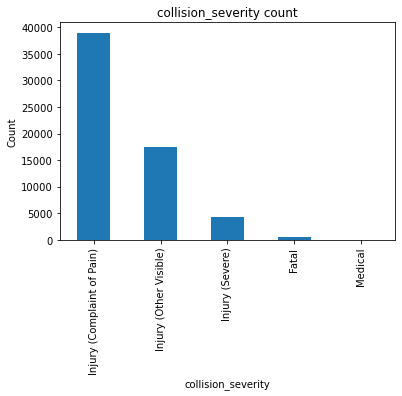

In [24]:
df_selected["collision_severity"].value_counts().plot(kind='bar')
plt.title("collision_severity count")
plt.xlabel("collision_severity")
plt.ylabel("Count")

5.MODELING AND PREDICTIONS

6.RECOMMENDATIONS